# Importing libraries :

In [3]:
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Research questions : 
## - What neighborhoods associated with the most and the least patients ?
## - What's the relation between diseases and different ages, and their attendance ?
## - What are the characteristics of all patients, people who showed up and who didn't ?
## - How many people received a scholarship / message ?
## - What is the health status of people who received a scholarship / message ? 
## - Does a message / scholarship have a positive effect on attendance ?

In [4]:
df=pd.read_csv('noshowupp.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)

In [7]:
df.duplicated().sum().sum()

0

In [8]:
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


# - 78,140 patients are females (which is about 65%) while the rest 32,387 patients are males (about 35%) 

# - Average patient age is 37  

# - Highest number of patients is found in " Jardim Camburi" with 7717 patients


In [9]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

# - About 75,045 patients received messages which is (67.9%) of total patients while the rest 35482 (32.1%) didn't

In [10]:
df.count()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hypertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#  Data Cleaning :
# - no null/duplicated values found.
# - Illogical value noticed : minimum age is stated in negative numbers.
# - we will need to drop id columns since its useless in the data analysis process.

In [12]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


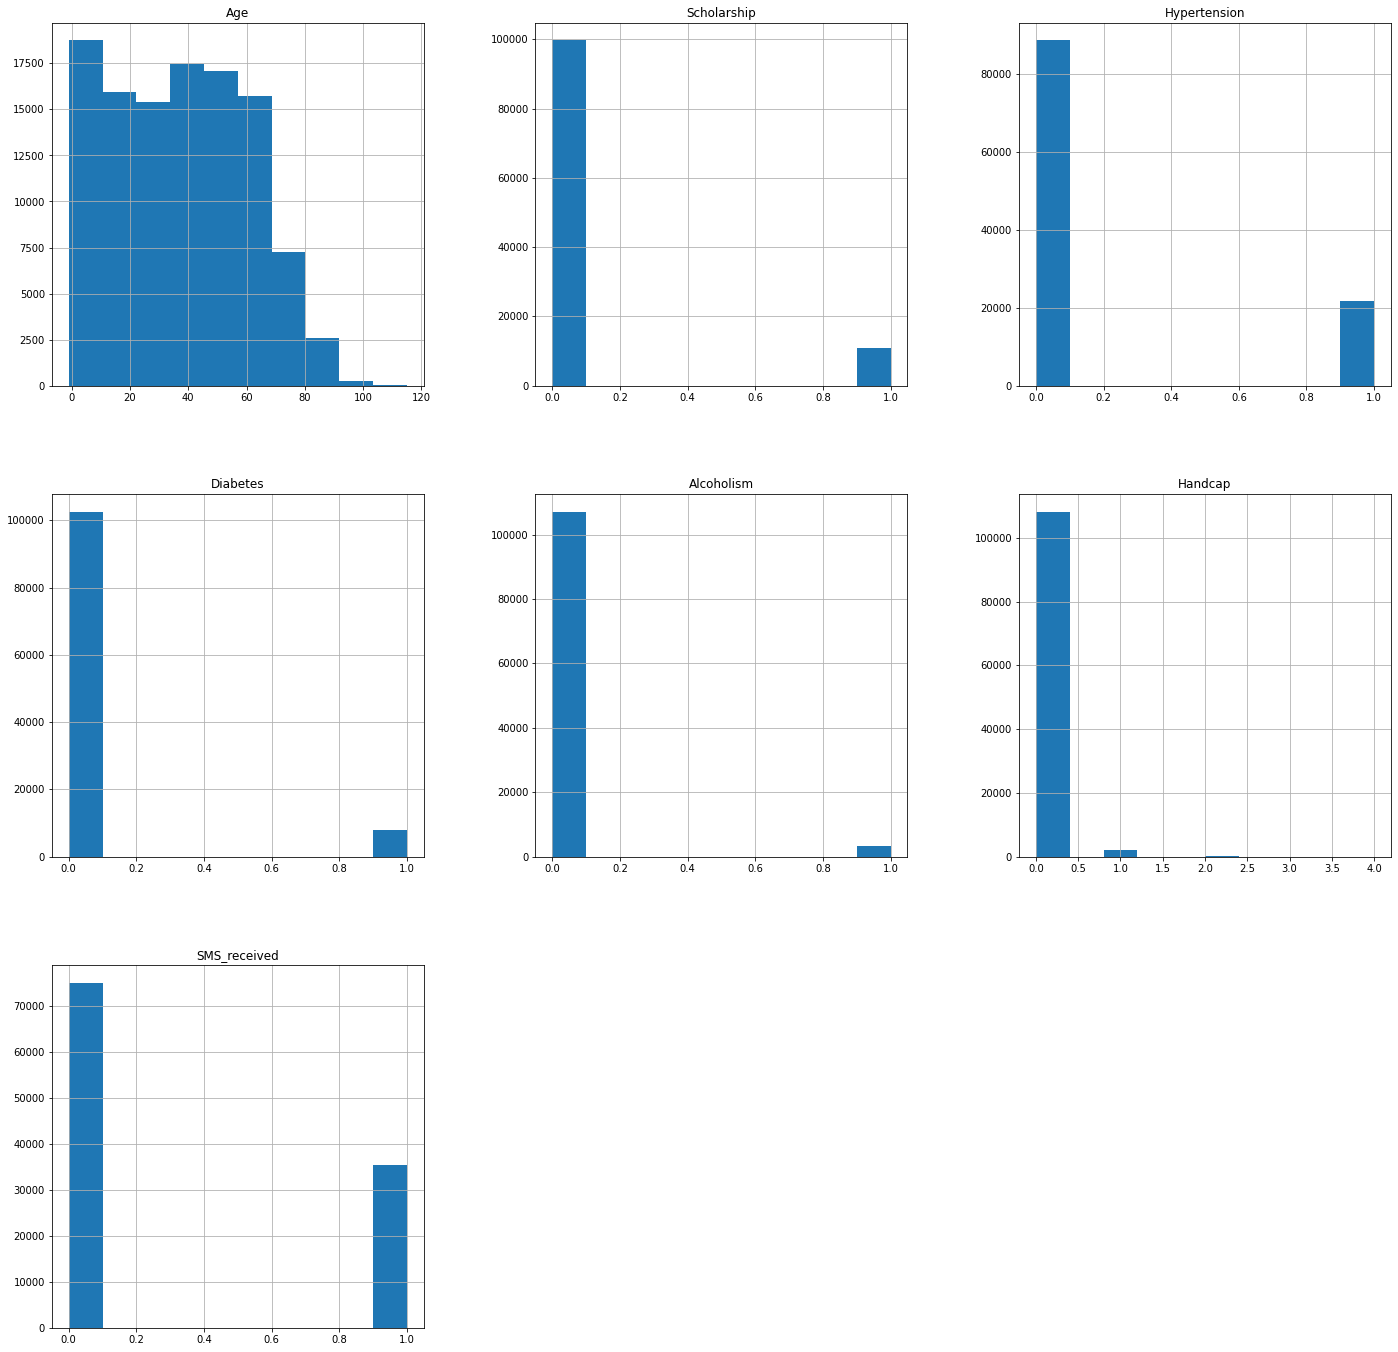

In [13]:
df.hist(figsize=(24,24));

# - Most patients aren't diabetic 
# - Most patients don't have hypertension
# - The majority of patients don't have a scholarship
# - About half of patients received an sms while the rest didn't
# - Most patients aren't handicapped
# - The majority of patients aren't alcoholic


# Which neighborhoods associated with more patients?

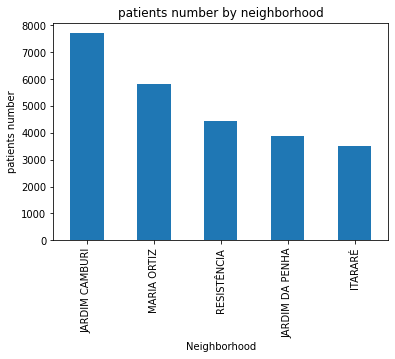

In [14]:
(df['Neighbourhood'].value_counts(normalize=False)).head().plot(kind='bar');
plt.title('patients number by neighborhood');
plt.xlabel('Neighborhood');
plt.ylabel('patients number');

# We notice that :
# - "Jardim Camburi" in the first place with the highest number of  patients 

# - Then "Maria Ortiz" in the second place 

# - Then "Resistencia" 

# - Then " Jardim da penha"

# - And lastly "Itarare"

In [47]:
    df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

# - Neighborhood with the lowest patients number is "Parque industrial"

In [40]:
showedup=df['No-show'][df['No-show']=='No']
notshowedup=df['No-show'][df['No-show']=='Yes']
print(showedup.count())
print(notshowedup.count())

88208
22319




## -88208 patients showed up (about 79.8% of total patients showed up)

## -22319 patients didnt show up (about 20.2% of total patients DID NOT show up)

# - Paitients who showed up and who didn't  according to age and disease :

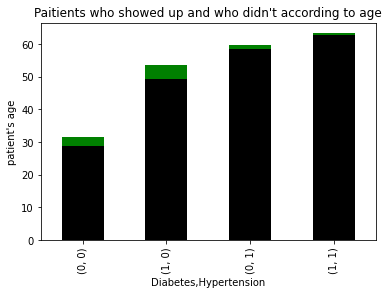

In [17]:
plt.title('Paitients who showed up and who didn\'t according to age');
plot1=showedup.groupby(['Diabetes','Hypertension']).mean()['Age'].sort_values().plot(kind='bar',color='green');
plot2=notshowedup.groupby(['Diabetes','Hypertension']).mean()['Age'].sort_values().plot(kind='bar',color='black');
plt.ylabel('patient\'s age');


 # What days had the most patients ?

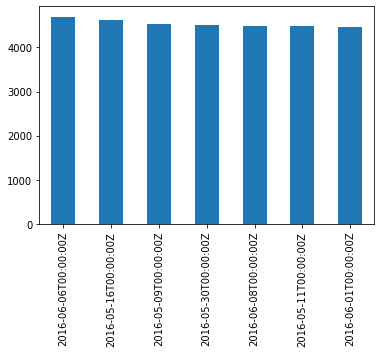

In [18]:
(df['AppointmentDay'].value_counts(normalize=False)).head(7).plot(kind='bar');

# What gender is more associated with hypertension?

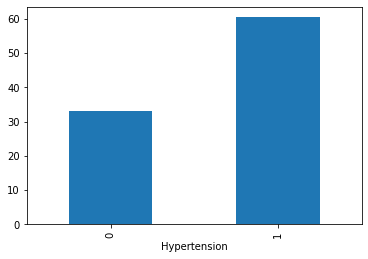

In [19]:
females=(df[df['Gender']=='F'])
males=(df[df['Gender']=='M'])
females.groupby(['Hypertension'])['Age'].mean().plot(kind='bar');

## More females have hypertension (with a mean age of 60.5 ) than those who don't (with a mean age of 33 )

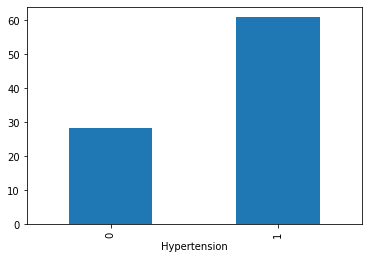

In [20]:
males.groupby(['Hypertension'])['Age'].mean().plot(kind='bar');

## More males have hypertension (with a mean age of 61 ) than those who don't (with a mean age of 28 )

# How old are people who showed up and who didn't ?

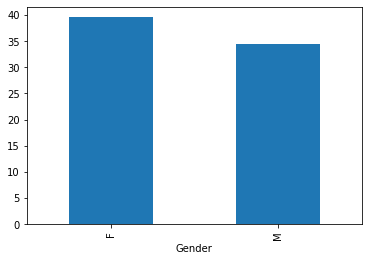

In [21]:
showedup.groupby('Gender')['Age'].mean().plot(kind='bar');

## - Females tend to show up more than males.
## - Mean age for people who showed up is 39.5 for females and 34.5 for males 







# What are the most and least neighborhoods associated with hypertension and diabetes for women ?



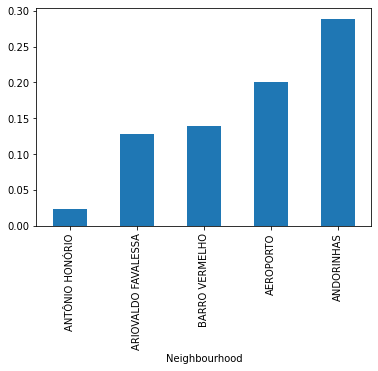

In [22]:
females.groupby('Neighbourhood').mean().head()['Hypertension'].sort_values().plot(kind='bar');


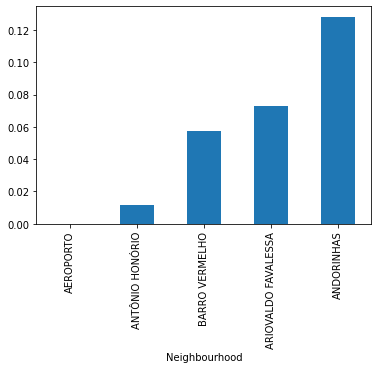

In [23]:
females.groupby('Neighbourhood').mean().head()['Diabetes'].sort_values().plot(kind='bar');

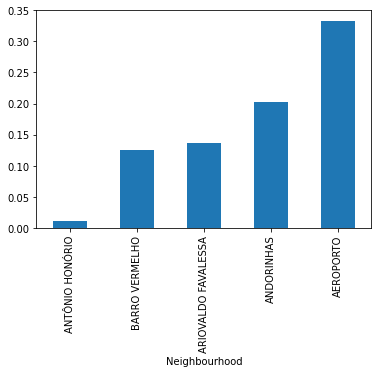

In [24]:
males.groupby('Neighbourhood').mean().head()['Hypertension'].sort_values().plot(kind='bar');

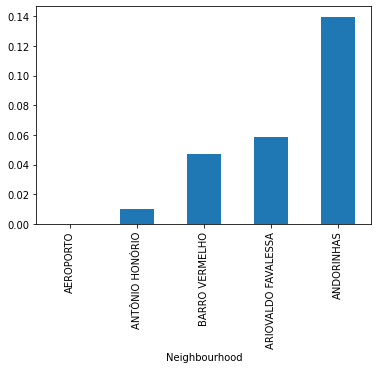

In [25]:
males.groupby('Neighbourhood').mean().head()['Diabetes'].sort_values().plot(kind='bar');

In [26]:
print((df[df['Diabetes']==0]).count())

Gender            102584
ScheduledDay      102584
AppointmentDay    102584
Age               102584
Neighbourhood     102584
Scholarship       102584
Hypertension      102584
Diabetes          102584
Alcoholism        102584
Handcap           102584
SMS_received      102584
No-show           102584
dtype: int64


In [27]:
print((df[df['Diabetes']==1]).count())

Gender            7943
ScheduledDay      7943
AppointmentDay    7943
Age               7943
Neighbourhood     7943
Scholarship       7943
Hypertension      7943
Diabetes          7943
Alcoholism        7943
Handcap           7943
SMS_received      7943
No-show           7943
dtype: int64


In [28]:
print((df[df['Hypertension']==0]).count())

Gender            88726
ScheduledDay      88726
AppointmentDay    88726
Age               88726
Neighbourhood     88726
Scholarship       88726
Hypertension      88726
Diabetes          88726
Alcoholism        88726
Handcap           88726
SMS_received      88726
No-show           88726
dtype: int64


In [29]:
print((df[df['Hypertension']==1]).count())

Gender            21801
ScheduledDay      21801
AppointmentDay    21801
Age               21801
Neighbourhood     21801
Scholarship       21801
Hypertension      21801
Diabetes          21801
Alcoholism        21801
Handcap           21801
SMS_received      21801
No-show           21801
dtype: int64


In [30]:
df[(df['Gender']=='M')  & (df['Hypertension']==0)][['Hypertension','Age']].count()

Hypertension    32225
Age             32225
dtype: int64

In [31]:
df[(df['Gender']=='M')  & (df['Diabetes']==0)][['Diabetes','Age']].count()

Diabetes    36350
Age         36350
dtype: int64

In [32]:
df[(df['Gender']=='F')  & (df['Hypertension']==1)][['Hypertension','Age']].count()

Hypertension    15339
Age             15339
dtype: int64

In [33]:
df[(df['Gender']=='F')  & (df['Diabetes']==1)][['Diabetes','Age']].count()

Diabetes    5606
Age         5606
dtype: int64

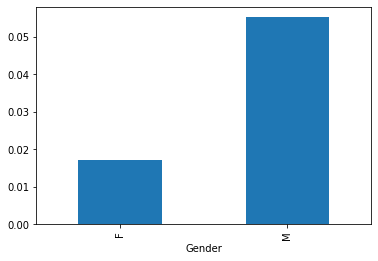

In [34]:
df['Alcoholism'].groupby(df['Gender']).mean().plot(kind='bar');